Initial shape: (103050, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103050 entries, 0 to 103049
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103050 non-null  object 
 1   is_canceled                     103050 non-null  int64  
 2   lead_time                       103050 non-null  int64  
 3   arrival_date_year               103050 non-null  int64  
 4   arrival_date_month              103050 non-null  object 
 5   arrival_date_week_number        102204 non-null  float64
 6   arrival_date_day_of_month       103050 non-null  int64  
 7   stays_in_weekend_nights         103050 non-null  int64  
 8   stays_in_week_nights            103050 non-null  int64  
 9   adults                          103048 non-null  float64
 10  children                        103048 non-null  float64
 11  babies                          103050 non-null  i

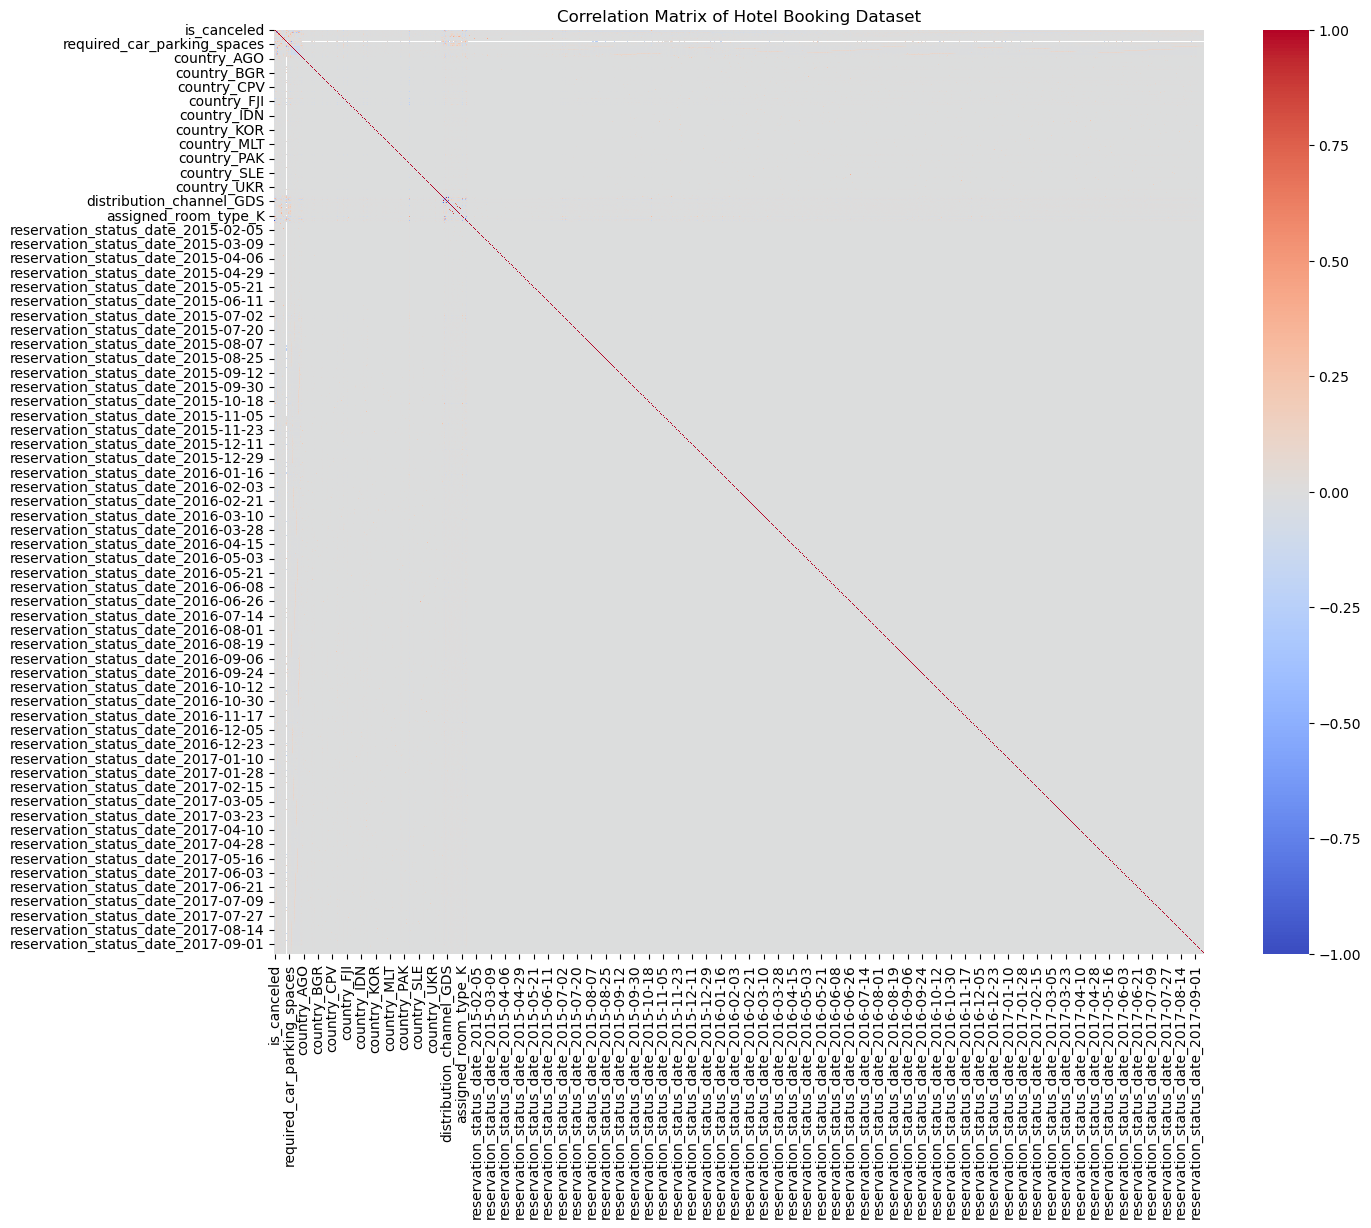

C:\Users\mohit\AppData\Local\Temp\ipykernel_5872\902715519.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  correlation_matrix.where(~pd.np.tril(pd.np.ones(correlation_matrix.shape)).astype(bool))  # Upper triangle only


                           Feature 1                      Feature 2  \
239                      is_canceled   reservation_status_Check-Out   
222230         market_segment_Direct    distribution_channel_Direct   
235470          reserved_room_type_H           assigned_room_type_H   
226030   distribution_channel_Direct     distribution_channel_TA/TO   
234531          reserved_room_type_G           assigned_room_type_G   
247580       customer_type_Transient  customer_type_Transient-Party   
222232         market_segment_Direct     distribution_channel_TA/TO   
232650          reserved_room_type_E           assigned_room_type_E   
233591          reserved_room_type_F           assigned_room_type_F   
231708          reserved_room_type_D           assigned_room_type_D   
16193                          agent             hotel_Resort Hotel   
229821          reserved_room_type_B           assigned_room_type_B   
230765          reserved_room_type_C           assigned_room_type_C   
224130

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hotel_bookings.csv')

print("Initial shape:", df.shape)
print(df.info())

df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Hotel Booking Dataset')
plt.show()

corr_table = (
    correlation_matrix.where(~pd.np.tril(pd.np.ones(correlation_matrix.shape)).astype(bool))  # Upper triangle only
    .stack()
    .reset_index()
)
corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_table['AbsCorrelation'] = corr_table['Correlation'].abs()
corr_table = corr_table.sort_values(by='AbsCorrelation', ascending=False)

print(corr_table.head(20))


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.278149           0.004463   
lead_time                          0.278149   1.000000           0.040982   
arrival_date_year                  0.004463   0.040982           1.000000   
arrival_date_week_number           0.004671   0.120174          -0.530396   
arrival_date_day_of_month         -0.005395  -0.003288           0.005025   
stays_in_weekend_nights           -0.023416   0.048157           0.020381   
stays_in_week_nights               0.004224   0.125314           0.031773   
adults                             0.037640   0.073243           0.061133   
children                           0.005450  -0.049550           0.065178   
babies                            -0.031996  -0.021703          -0.009587   
is_repeated_guest                 -0.030249  -0.055355          -0.022211   
previous_cancellations             0.117764   0.100090          -0.133836   

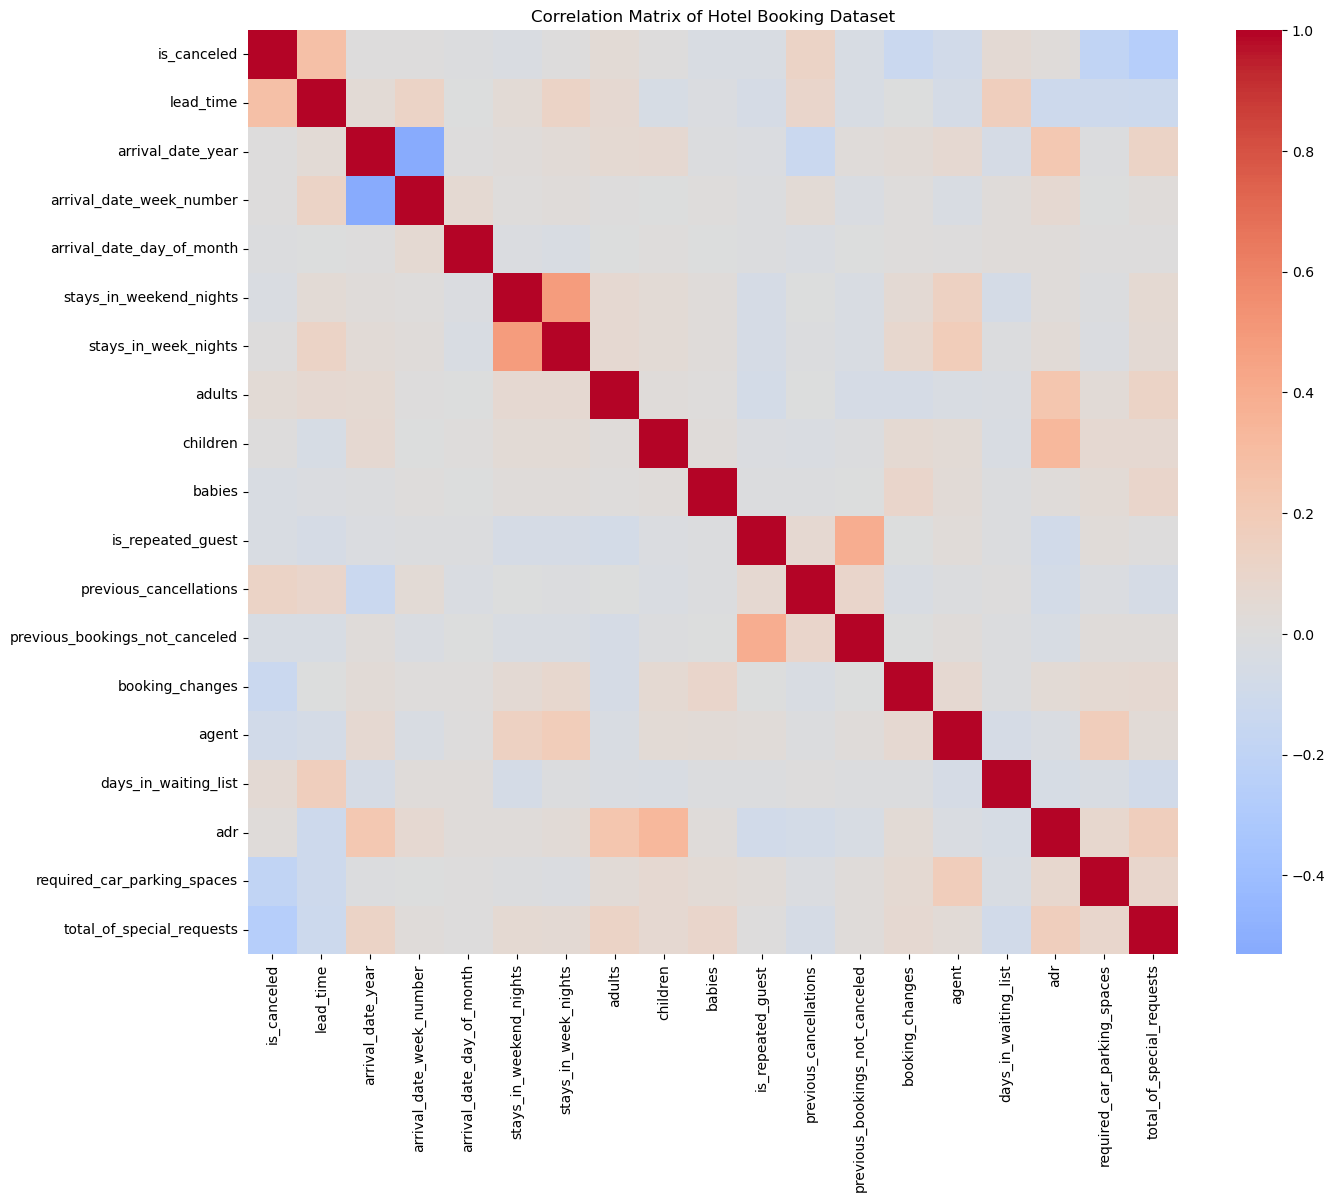

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("hotel_bookings.csv")

# Drop non-numeric and low info columns
drop_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
             'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
             'reservation_status', 'reservation_status_date', 'company','agent']  # 'company' has lots of missing values
df_numeric = df.drop(columns=drop_cols)

# Drop rows with missing numeric values
df_numeric = df_numeric.dropna()

# Generate correlation table
correlation_table = df_numeric.corr()

# Display or export
print(correlation_table)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_table, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Hotel Booking Dataset')
plt.show()

